# Chain Panel
Author(s) Paul Miles | July 17, 2019

This tutorial provides a demonstration of the chain panel plotting routine available in `mcmcplot`.

In [1]:
# import required packages
import numpy as np
from mcmcplot import mcmcplot as mcp
import mcmcplot
print(mcmcplot.__version__)

1.0.0


# Generate Random Chains
The plotting routines are designed to be used in conjunction with the result of a MCMC simulation.  For the purpose of this example, we consider a randomly generated chain.  We will consider a chain with 3 parameters that have the following distributions:
- $p_{0} \sim N(1.0, 0.5)$
- $p_{1} \sim N(2.5, 3.0)$
- $p_{2} \sim N(-1.3, 0.75)$

In [2]:
nsimu = 1000
npar = 3
mu = np.array([1.0, 2.5, -1.3])
sig = np.array([0.5, 3.0, 0.75])
chain = np.zeros([nsimu, npar])
for ii in range(npar):
    chain[:,ii] = sig[ii]*np.random.randn(nsimu,) + mu[ii]

# Default Chain Panel
The chain panel simply demonstrates the sampling history of the chains.  Note, the plotting routines output the figure handle as well as a dictionary containing the settings used in generating the plot when the keyword argument `return_settings=True`.

{'fig': {'figsize': (5, 4), 'dpi': 100}, 'plot': {'color': 'b', 'marker': '.', 'linestyle': 'none'}, 'xlabel': {'xlabel': 'Iteration'}, 'ylabel': {}, 'add_pm2std': False, 'mean': {'color': 'k', 'marker': None, 'linestyle': '-', 'linewidth': 3}, 'sig': {'color': 'r', 'marker': None, 'linestyle': '--', 'linewidth': 3}}


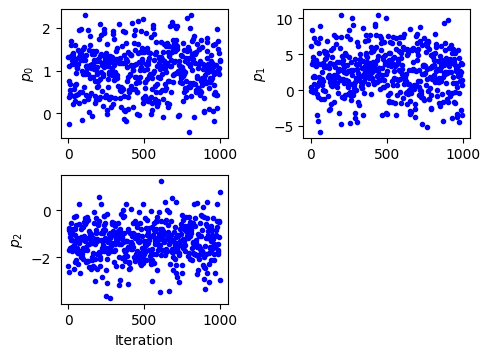

In [3]:
f, settings = mcp.plot_chain_panel(chains=chain,
                                  return_settings=True)
print(settings)

# Add Lines Represented Mean and $\pm$ 2 Standard Deviations
We can adjust various aspects of the figure.  For example, we can add lines to represent the mean and $\pm$ 2 standard deviations (adjust the colors), and make the sample points black.

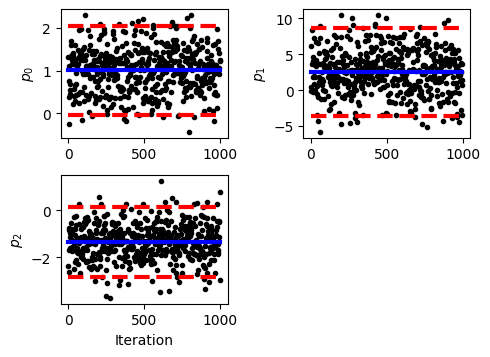

In [4]:
f = mcp.plot_chain_panel(
    chains=chain,
    settings=dict(
        add_pm2std=True,
        mean=dict(color='b'),
        plot=dict(color='k')))

As a sanity check we observe that the reported standard deviation for $p_{0}$ was 0.5, and the red lines are roughly at 0 and 2 as expected.

# Change Marker Style and Define Parameter Names
We can change the marker style, define the parameter names to be displayed on the plots, and change the dimensions of the figure.

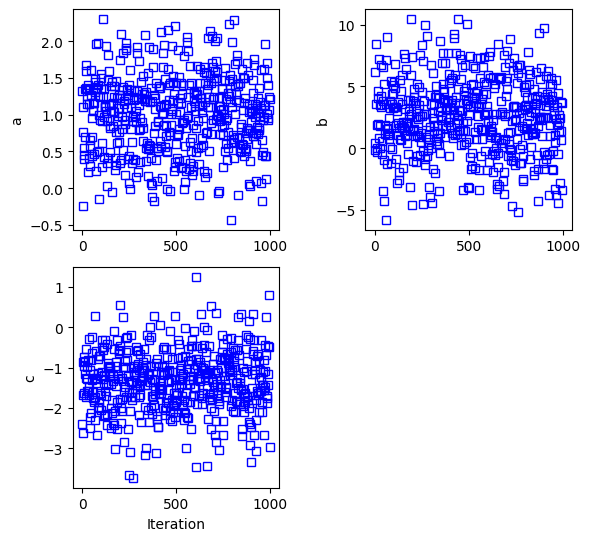

In [5]:
user_settings = dict(
    plot=dict(
        marker='s',
        mfc='none'),
    fig=dict(figsize=(6, 6)))
names = ['a', 'b', 'c']
f = mcp.plot_chain_panel(
    chains=chain,
    names=names,
    settings=user_settings)

# Update Label Features
You can also edit the settings for the axis labels.

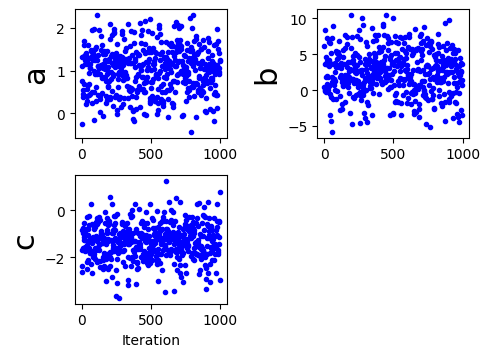

In [6]:
user_settings = dict(ylabel=dict(fontsize=22))
f = mcp.plot_chain_panel(
    chains=chain,
    names=names,
    settings=user_settings)

# Manually Manipulate Plot Features
With the figure handle, you can also individual edit different aspects of the plot.  See [matplotlib's documentation](https://matplotlib.org/index.html) for more details on editing figures.

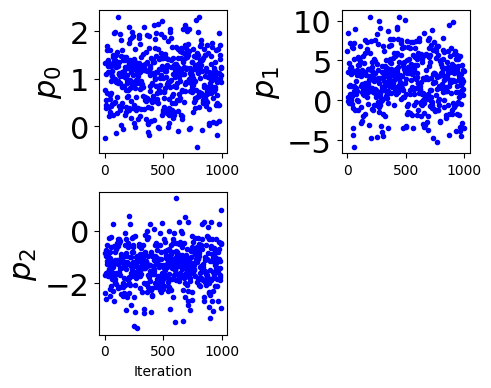

In [7]:
f = mcp.plot_chain_panel(chains=chain)
ax = f.get_axes()
for ai in ax:
    ai.set_ylabel(ylabel=ai.get_ylabel(),
                  fontsize=22)
    ai.set_yticklabels(labels=ai.get_yticklabels(),
                       fontsize=22)
# reset positions to avoid overlap    
f.tight_layout()